In [1]:
%matplotlib inline

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

# Adult Income Dataset

## Exploratory and Data Analysis

In [3]:
adult_income = pd.read_csv('data/adult.csv')

In [5]:
def check_df(dataframe, head=5):
    print("######################### SHAPE #########################")
    print(dataframe.shape)
    print("######################### DTYPES #########################")
    print(dataframe.dtypes)
    print("######################### NULL VALUES #########################")
    print(dataframe.isnull().sum())
    print("######################### INFO #########################")
    print(dataframe.info())
    print("######################### HEAD #########################")
    print(dataframe.head(head))
    print("######################### TAIL #########################")
    print(dataframe.tail(head))
    print("######################### DESCRIBE #########################")
    print(dataframe.describe().T)
    
check_df(adult_income)

######################### SHAPE #########################
(48842, 15)
######################### DTYPES #########################
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object
######################### NULL VALUES #########################
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
######################### INFO #########################
<class 'pandas.cor

In [7]:
# Rename the columns contains '-'
adult_income.columns = [col.replace('-', '_') for col in adult_income.columns]

In [26]:
def check_uniques(dataframe):
    for col in dataframe.columns:
        print(' '*20)
        print(col.upper())
        print(dataframe[col].unique())
check_uniques(adult_income)

                    
AGE
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
                    
WORKCLASS
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
                    
FNLWGT
[226802  89814 336951 ... 129912 255835 257302]
                    
EDUCATION
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
                    
EDUCATIONAL_NUM
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
                    
MARITAL_STATUS
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
                    
OCCUPATION
['Machine-op-inspct' 'Farming-fishing' 'Protectiv

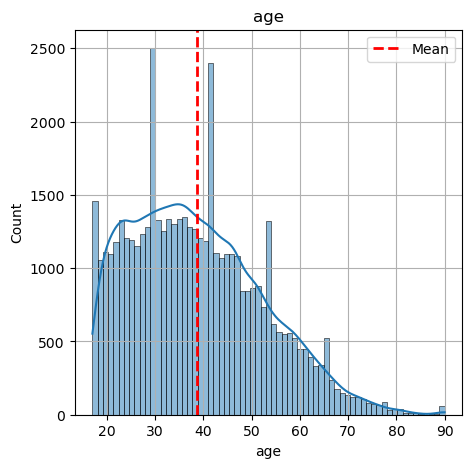

Mean: 38.64358543876172
Std: 13.71050993444322
Skewness: 0.5575803166133181
Kurtosis -0.18426874062387766


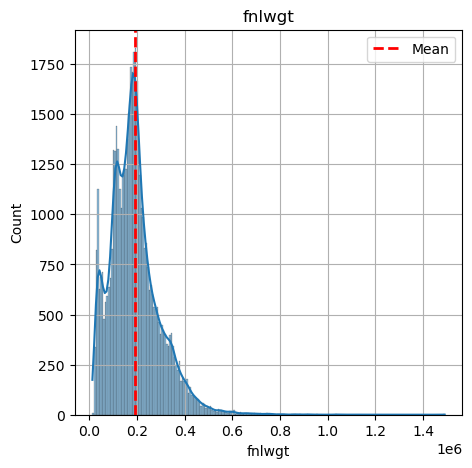

Mean: 189664.13459727284
Std: 105604.02542315713
Skewness: 1.4388918785218416
Kurtosis 6.05784821246471


In [54]:
def view_histogram(dataframe, columns = None):    
    num_columns = dataframe.select_dtypes(include=['int64','float64']).columns if columns is None else \
    columns
    
    for col in num_columns:    
        mean_value = dataframe[col]. mean()
        
        plt.figure(figsize=(5,5))
        plt.grid(True)
        plt.title(dataframe[col].name)
        sns.histplot(dataframe[col], kde=True)
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
        plt.legend()
        plt.show()
        
        print('Mean:', mean_value)
        print('Std:', dataframe[col].std())
        print('Skewness:', dataframe[col].skew())
        print('Kurtosis', dataframe[col].kurt())
        
view_histogram(adult_income, columns=['age', 'fnlwgt'])

### Cleaning dataset

In three features - workclass, occupation, and native_country - there are values '?'.

In [62]:
rows_with_questionmark = adult_income[adult_income.apply(lambda row: '?' in row.values, axis=1)]

In [81]:
round(len(rows_with_questionmark)/len(adult_income)*100, 4)

7.4117

There are 7.4117 percent 

In [69]:
# Replace '?' with 'NaN'
clean_adult_imcome = adult_income.replace('?',pd.NA,)

In [75]:
clean_adult_imcome.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
race                  0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

In [76]:
clean_adult_imcome.dropna(inplace = True)

In [77]:
clean_adult_imcome.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational_num    0
marital_status     0
occupation         0
relationship       0
race               0
gender             0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
income             0
dtype: int64

In [78]:
clean_adult_imcome.shape

(45222, 15)